In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

In [3]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [4]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-013.png', 'rock01-116.png', 'rock02-105.png', 'rock07-k03-037.png', 'rock04-019.png', 'rock01-084.png', 'rock02-033.png', 'rock02-003.png', 'rock04-002.png', 'rock04-032.png']
['paper07-074.png', 'paper03-020.png', 'paper06-098.png', 'paper05-078.png', 'paper06-035.png', 'paper04-119.png', 'paper02-065.png', 'paper07-004.png', 'paper07-048.png', 'paper04-025.png']
['scissors02-004.png', 'scissors04-000.png', 'scissors01-039.png', 'testscissors03-049.png', 'scissors03-069.png', 'scissors01-056.png', 'testscissors02-091.png', 'testscissors03-102.png', 'testscissors01-006.png', 'scissors04-105.png']


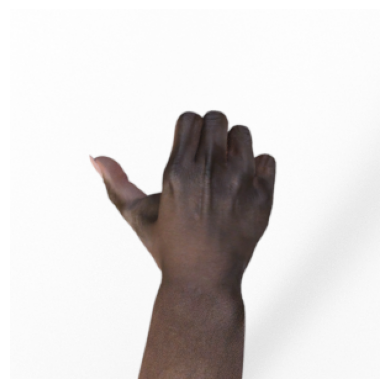

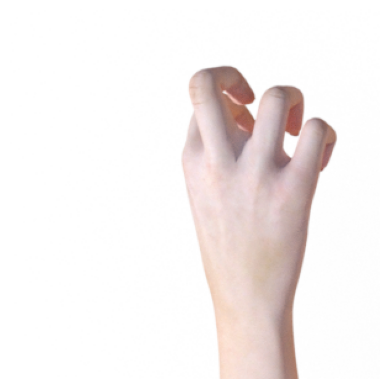

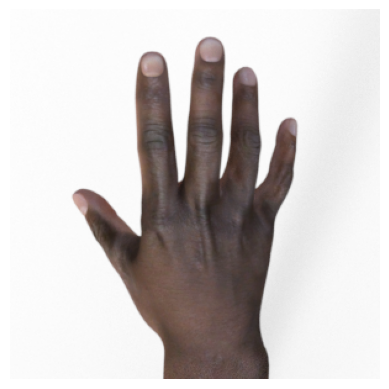

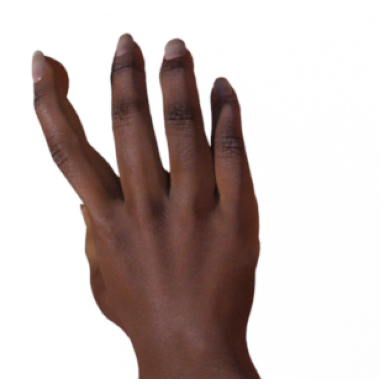

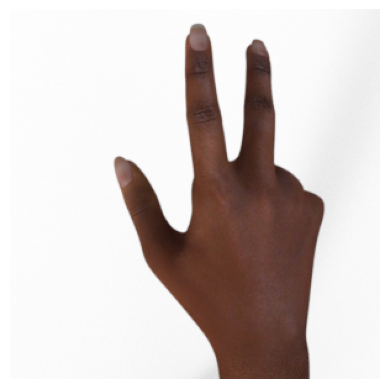

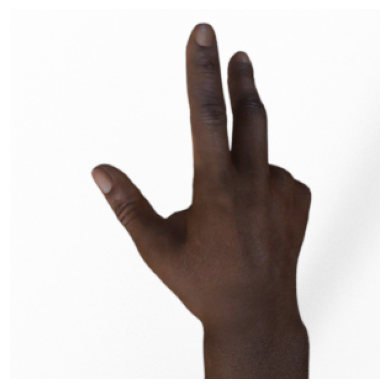

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/25
20/20 [==============================] - 33s 1s/step - loss: 1.2315 - accuracy: 0.3468 - val_loss: 1.0953 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.0987 - accuracy: 0.3782 - val_loss: 1.0806 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0803 - accuracy: 0.4032 - val_loss: 1.3407 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 1.0805 - accuracy: 0.4369 - val_loss: 0.8744 - val_accuracy: 0.7339
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.9349 - accuracy: 0.5433 - val_loss: 0.6176 - val_accuracy: 0.6720
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.7948 - accuracy: 0.6357 - val_loss: 0.6831 - val_accuracy: 0.5914
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.7512 - accuracy: 0.6647 - val_loss: 0.4001 - val_accuracy: 0.8522
Epoch 8/25
20/20 [==

In [16]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper7.png to paper7 (2).png
Saving rock2.png to rock2 (1).png
Saving rock7.png to rock7 (1).png
Saving scissors1.png to scissors1 (1).png
1/1 [==============================] - 0s 18ms/step
paper7 (2).png
[[1. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
rock2 (1).png
[[0. 1. 0.]]
1/1 [==============================] - 0s 17ms/step
rock7 (1).png
[[0. 1. 0.]]
1/1 [==============================] - 0s 20ms/step
scissors1 (1).png
[[0. 0. 1.]]


1/1 [==============================] - 0s 29ms/step


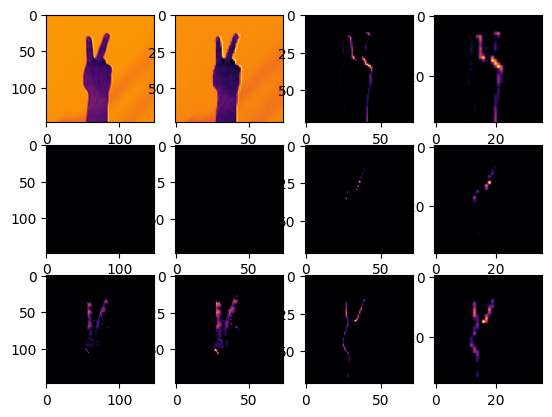

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  for i in range(0,4):
    f1 = activation_model.predict(x)[i]
    axarr[0,i].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,i].grid(False)

    f2 = activation_model.predict(x)[i]
    axarr[1,i].imshow(f2[0, : , :, 3], cmap='inferno')
    axarr[1,i].grid(False)

    f3 = activation_model.predict(x)[i]
    axarr[2,i].imshow(f3[0, : , :, 5], cmap='inferno')
    axarr[2,i].grid(False)
